In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import ipywidgets
from ipywidgets import interact, interactive, Dropdown, widgets
from IPython.display import clear_output, display, HTML

In [4]:
import os
import pickle
import pprint
from glob import glob
os.chdir('/home/users/alexno/sleep-staging')

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from h5py import File

from utils.plotting import plot_psg_hypnogram_hypnodensity
from utils.plotting import plot_hypnodensity

In [5]:
available_predictions = glob("experiments/**/SSC-WSC_test_predictions.pkl", recursive=True)
pprint.pprint(available_predictions)

['experiments/massc/att30/20201124_080609/SSC-WSC_test_predictions.pkl',
 'experiments/massc/avg_kw21/20201126_043826/SSC-WSC_test_predictions.pkl']


In [6]:
selected_experiment = available_predictions[1]
with open(selected_experiment, 'rb') as f:
    predictions = pickle.load(f)
list_studies = list(predictions.keys())
df_preds = pd.read_csv(os.path.join(os.path.dirname(selected_experiment), 'SSC-WSC_test_results.csv'), index_col=0)
df = pd.read_csv('overview_file_cohortsEM-ling1.csv')
df_preds = pd.merge(left=df_preds, right=df[['ID', 'Diagnosis', 'Label']], how='left', right_on='ID', left_on='SubjectID')
# display(df_preds.query('Label == 1').sort_values('Balanced accuracy', ascending=False).head())

### SSC_5335_1 - Narcolepsy type 1

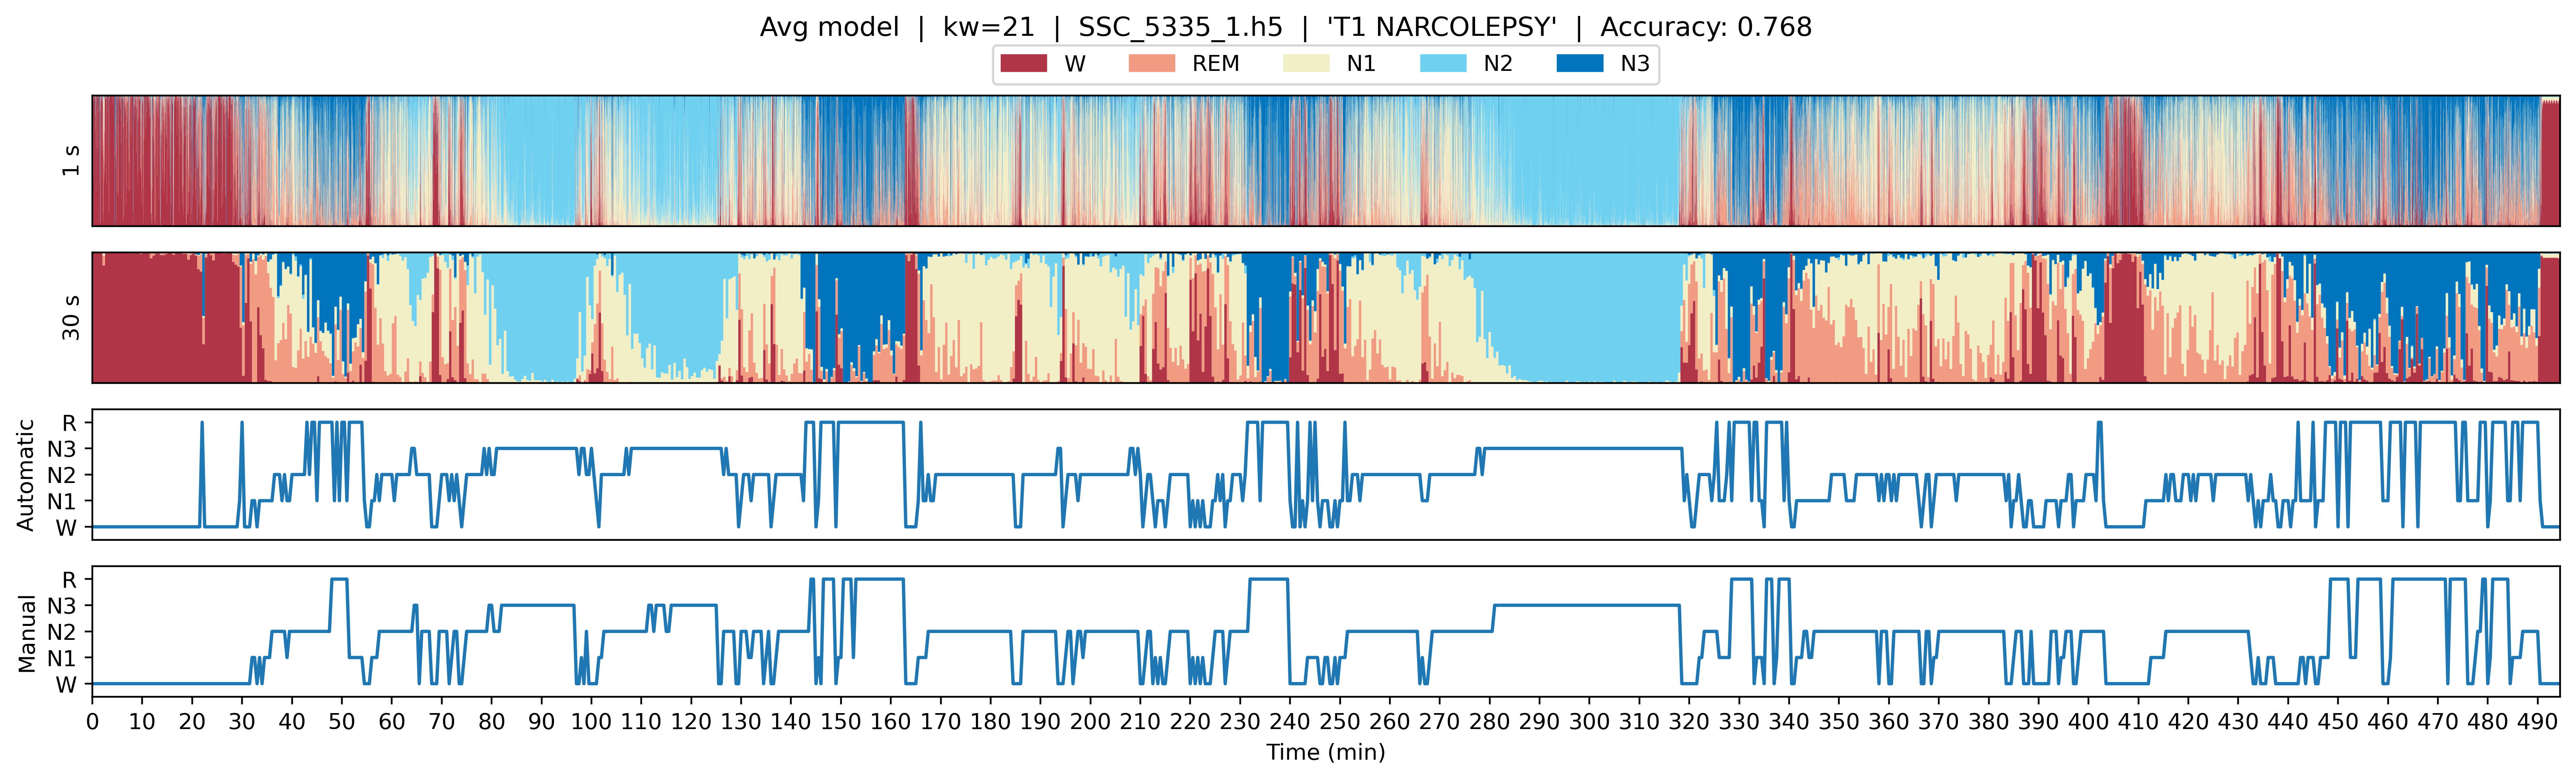

In [14]:
selected_record = 'SSC_5335_1.h5'
record = predictions[selected_record]
plot_hypnodensity(
    record['logits'], 
    record['predicted'], 
    record['true'], 
    title=("Avg model  |  " +
           "kw=21  |  " +
           f"{selected_record}  |  " +
           f"{df_preds.loc[df_preds['FileID'] == selected_record]['Diagnosis'].values[0]}  |  " +
           f"Accuracy: {df_preds.loc[df_preds['FileID'] == selected_record]['Balanced accuracy'].values[0]:.3f}")
)

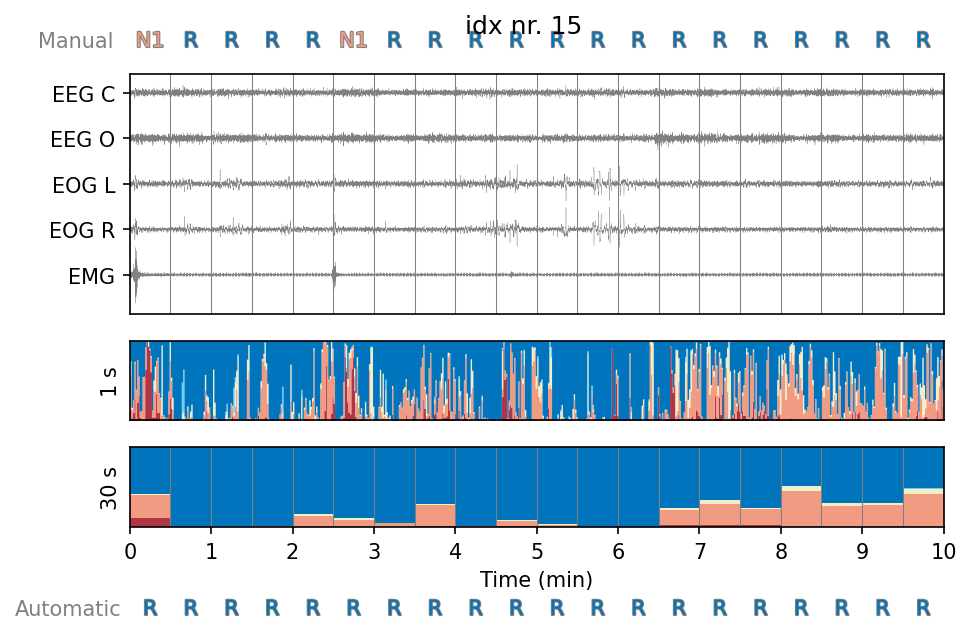

In [28]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=15,
)

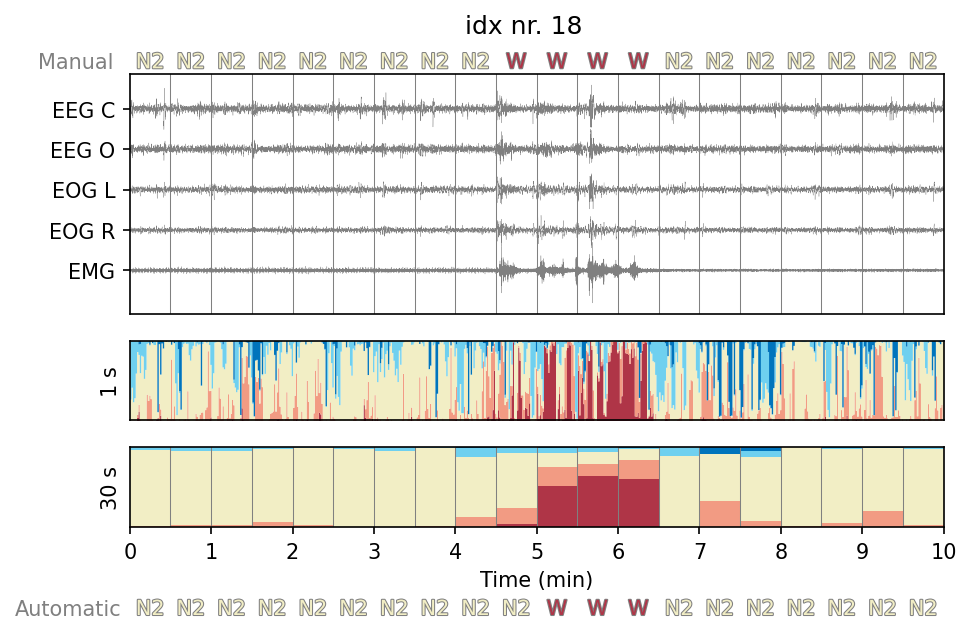

In [29]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=18,
)

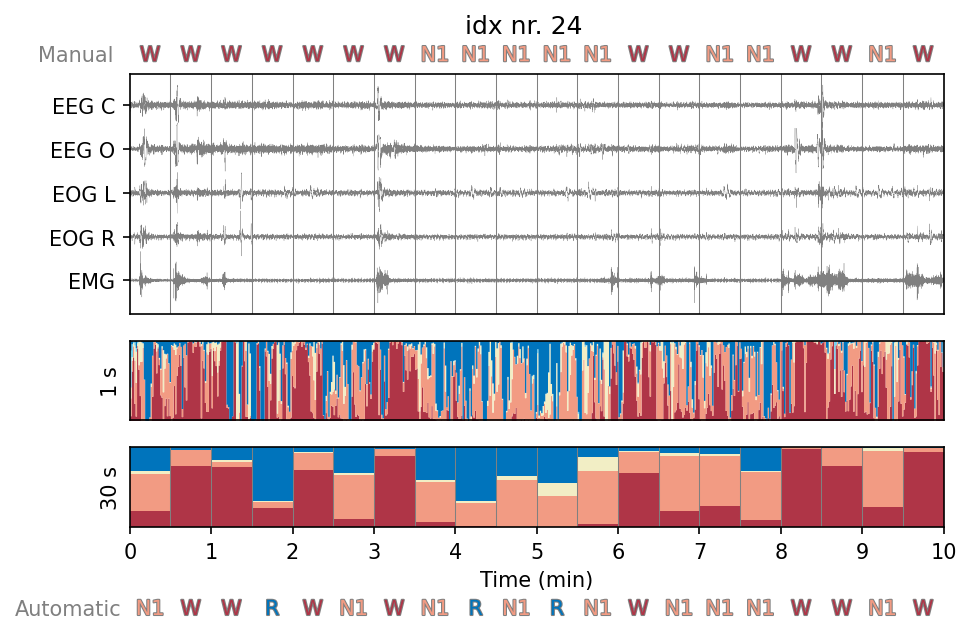

In [30]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=24,
)

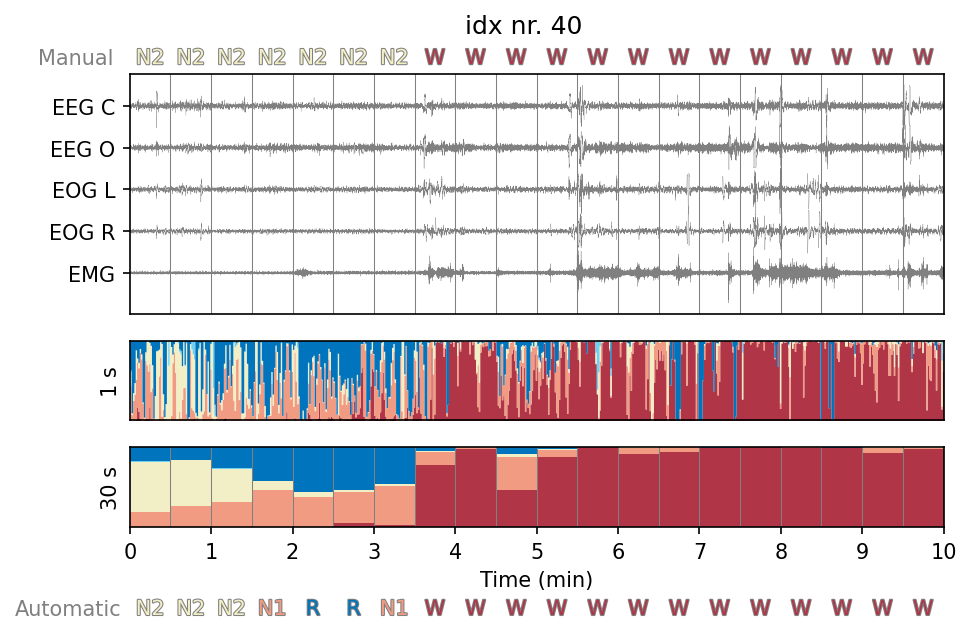

In [31]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=40,
)

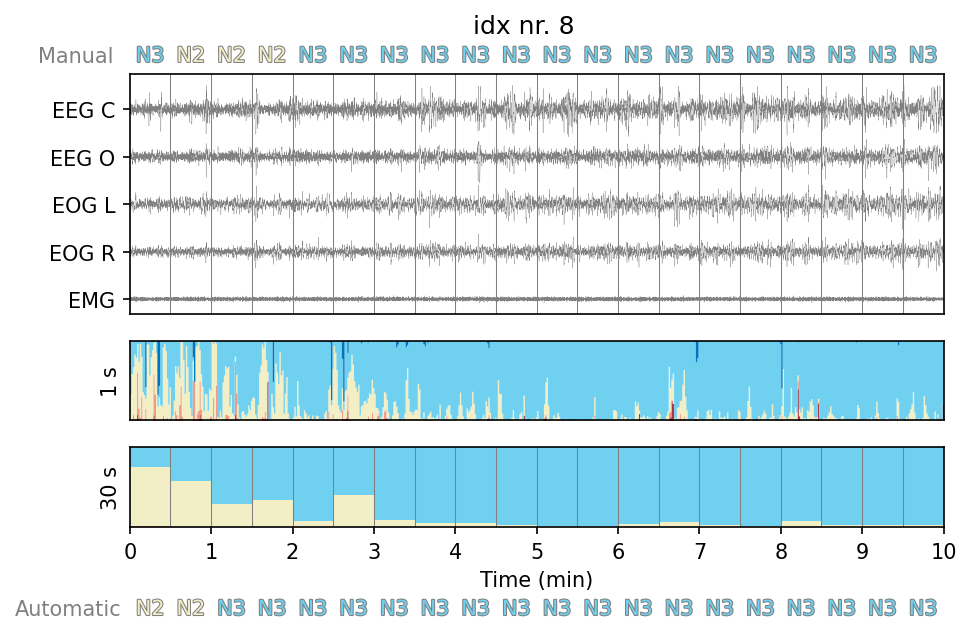

In [32]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=8
)

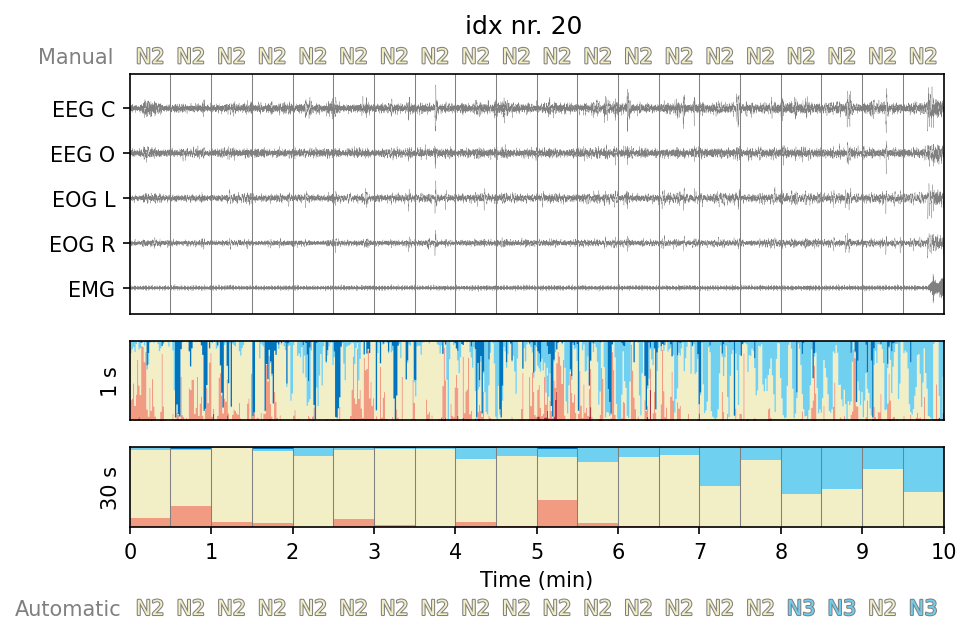

In [33]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=20,
    interval=10
)